In [26]:
import os
import pandas as pd
from tqdm import tqdm
import shutil
from src import utils
from scipy.stats import spearmanr
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Project path
project_dir = os.path.abspath('')[:-9]
# Load enviromental variables

env_var = utils.load_env_variables(project_dir)
env_var["root_path"] = "/home/tpinho/IJGIS/Datasets/Brazil_Election_2018/"

In [28]:
dataset = "Original"
scv_methods = ["CrossValidation","Optimistic", "RegGBSCV_R_Kappa_3.0", "TraditionalSCV", "RBuffer"]
ml_methods = ["KNN", "Lasso", "Ridge", "ElasticNet", "DT", "LGBM", "RF", "MLP", "SVM"]
fs_method = "CFS"
metric = "MCPM"

In [29]:
path = os.path.join(env_var["root_path"], dataset, "comparison", f"{fs_method}_{metric}.csv")
metric_results = pd.read_csv(path, index_col="Methods")
metric_results.drop("OLS", axis=0, inplace=True) 
metric_results.index = ["KNN", "LASSO", "Ridge", "ElasticNet", "DT", "GBDT", "RF", "MLP", "SVR"]

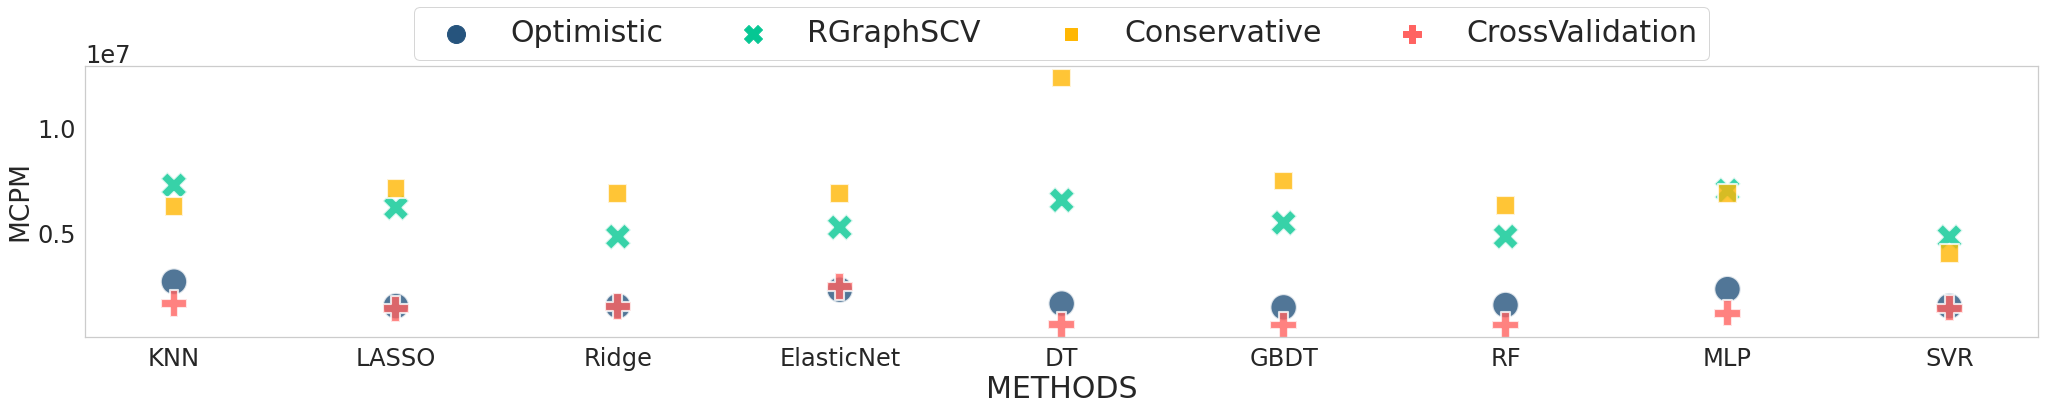

In [30]:
reorgnize_col = ["Optimistic", "RGraphSCV", "Conservative", "CrossValidation", "RBuffer"]
metric_results.rename(columns={"TraditionalSCV": "Conservative", "RegGBSCV_R_Kappa_3.0": "RGraphSCV", "RBffer": "RBuffer"}, inplace=True)
metric_results = metric_results[reorgnize_col]
#palette = [ "#26547dff", "#05c793ff","#ffb703ff", "#ff6361ff"]
palette = [ "#26547dff", "#05c793ff","#ffb703ff","#ff6361ff", "#bc5090ff" ]
sns.set(font_scale=2.2)
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize=(35,5))
sns.scatterplot(data=metric_results, alpha=0.8, s=700,ax=ax, palette=palette)
ax.set_title("")
ax.set_xlabel("METHODS",fontsize=30)
ax.set_ylabel("MCPM")
#metric_results.plot.area(ax=ax, stacked=False, alpha=1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.27),
          fancybox=True, shadow=False, ncol=6, markerscale=3, fontsize=30)
plt.savefig(os.path.join(env_var["root_path"], dataset, "comparison",f"{metric}.jpg"), bbox_inches='tight', dpi=300)
